# Capstone 2: narrative analytics and experimentation

## How to reduce suicide?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Suicide Rate (UN)

In [2]:
df_sui = pd.read_csv('master.csv')

In [3]:
df_sui['country'] = df_sui['country'].apply(lambda x : x.lower())
df_sui_mean = df_sui[df_sui['year'] == 2015].groupby(['country']).mean().sort_values(by='suicides/100k pop',ascending = False)

In [4]:
df_sui_mean = df_sui_mean.drop(columns=['year','HDI for year', 'population','gdp_per_capita ($)'])

In [5]:
df_sui_mean = df_sui_mean.reset_index()

In [6]:
df_sui_mean = df_sui_mean.replace('united states','united states of america')
df_sui_mean = df_sui_mean.set_index('country')

In [7]:
df_sui_mean.head()

,suicides_no,suicides/100k pop
country,,
republic of korea,1125.833333,32.428333
lithuania,74.666667,32.123333
uruguay,52.500000,22.501667
slovenia,35.166667,22.067500
hungary,155.666667,21.439167


## World Happiness Report (UN)

In [8]:
df_happ = pd.read_csv('happy_2015.csv')
df_happ['Country'] = df_happ['Country'].apply(lambda x : x.lower())

In [9]:
df_happ = df_happ.replace('south korea','republic of korea')
df_happ = df_happ.replace('united states','united states of america')

In [10]:
df_happ = df_happ.set_index('Country')
df_happ.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Mental Hospital Sector (per 100K)

In [11]:
df_hospital = pd.read_csv('UNdata_Export_20190726_074514024.csv')

In [12]:
df_hospital['Country or Area'] = df_hospital['Country or Area'].apply(lambda x: x.lower())

In [13]:
df_hospital = df_hospital.set_index('Country or Area')

In [14]:
df_hospital = df_hospital.drop(columns=['Year(s)','Value Footnotes'])
df_hospital = df_hospital.rename(columns={"Value": "Mental hospitals (per 100,000)"})
df_hospital.head()

,"Mental hospitals (per 100,000)"
Country or Area,
afghanistan,0.00
albania,0.06
algeria,0.04
andorra,0.00
angola,0.01


## Psychiatrists Working in the Mental Health Sector (per 100,000)

In [15]:
df_psych = pd.read_csv('UN_psychiatrist.csv')

In [16]:
df_psych['Country or Area'] = df_psych['Country or Area'].apply(lambda x: x.lower())

In [17]:
df_psych = df_psych.set_index('Country or Area')

In [18]:
df_psych = df_psych.drop(columns=['Year(s)','Value Footnotes'])

In [19]:
df_psych = df_psych.rename(columns={"Value": "Psychiatrists (per 100,000)"})

In [20]:
df_psych.head()

,"Psychiatrists (per 100,000)"
Country or Area,
afghanistan,0.16
albania,1.83
algeria,1.55
andorra,6.92
angola,0.02


## Joining Dataframs for Research

In [21]:
df_join = pd.concat([df_sui_mean, df_happ, df_hospital, df_psych], axis=1, join='inner').reset_index()
df_join = df_join.rename(columns={"index": "Country"})
df_join.head()

,Country,suicides_no,suicides/100k pop,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,"Mental hospitals (per 100,000)","Psychiatrists (per 100,000)"
0,republic of korea,1125.833333,32.428333,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,2.54,5.12
1,lithuania,74.666667,32.123333,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649,0.34,17.76
2,slovenia,35.166667,22.067500,Central and Eastern Europe,55,5.848,0.04251,1.18498,1.27385,0.87337,0.60855,0.03787,0.25328,1.61583,0.30,7.06
3,hungary,155.666667,21.439167,Central and Eastern Europe,104,4.800,0.06107,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,1.24074,0.03,6.52
4,latvia,32.250000,20.955833,Central and Eastern Europe,89,5.098,0.04640,1.11312,1.09562,0.72437,0.29671,0.06332,0.18226,1.62215,0.27,10.85


In [22]:
top10Sui = df_join.nlargest(10,'suicides/100k pop')
bottm10Sui = df_join.nsmallest(10,'suicides/100k pop')

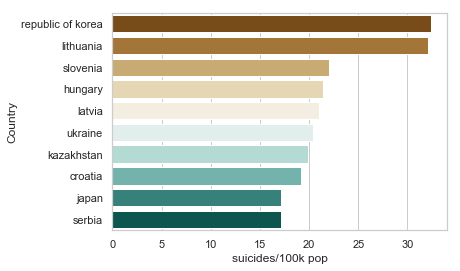

In [51]:
sns.set(style="whitegrid")
ax = sns.barplot(x="suicides/100k pop", y="Country", data=top10Sui, palette="BrBG")

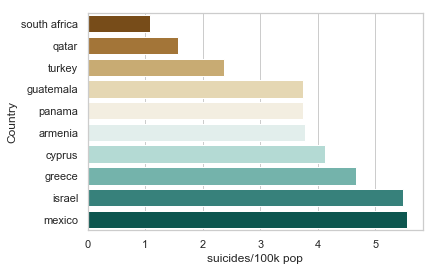

In [52]:
ax = sns.barplot(x="suicides/100k pop", y="Country", data=bottm10Sui, palette='BrBG')

## Relationships between variables

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


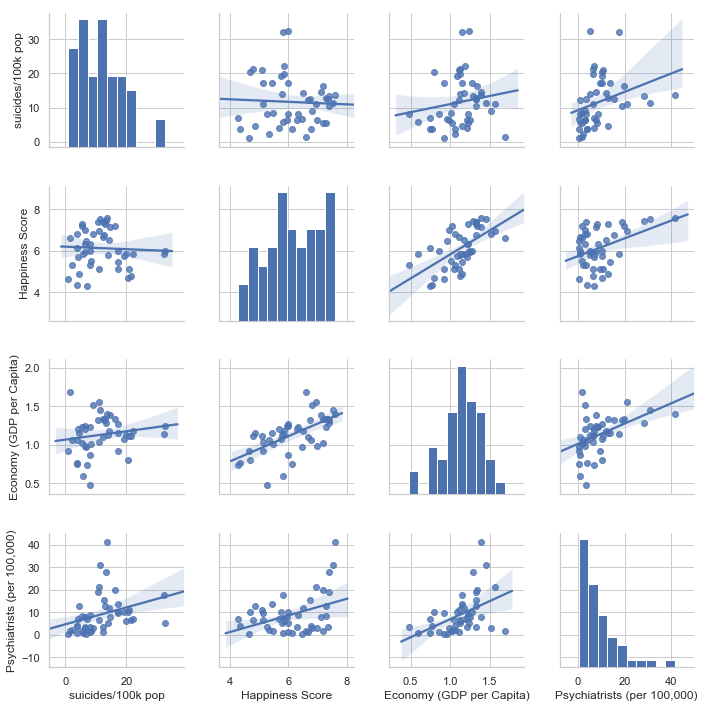

In [25]:
new_df = df_join[['Country','suicides/100k pop','Happiness Score','Economy (GDP per Capita)','Psychiatrists (per 100,000)']]
sns.pairplot(new_df, kind = 'reg')
plt.show()

According to the above plots, There is no correlation between happiness score and suicide rates. Instead, there is a slight relationship between Psychiatrists and suicide rates. Also, Economy status seems to be related to the suicide rate.

In [29]:
top10Sui['Ratio Psy/Sui'] =top10Sui['Psychiatrists (per 100,000)']/ top10Sui['suicides/100k pop']
bottm10Sui['Ratio Psy/Sui'] = bottm10Sui['Psychiatrists (per 100,000)']/ bottm10Sui['suicides/100k pop']

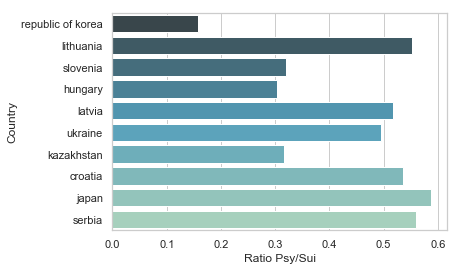

In [31]:
sns.barplot(x='Ratio Psy/Sui', y="Country", data=top10Sui, palette="GnBu_d")
plt.show()

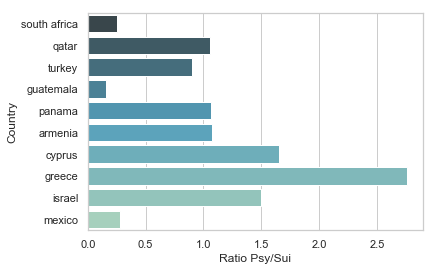

In [32]:
sns.barplot(x='Ratio Psy/Sui', y="Country", data=bottm10Sui, palette="GnBu_d")
plt.show()

In [62]:
top10Sui[['Country', 'suicides/100k pop','Economy (GDP per Capita)', 'Psychiatrists (per 100,000)','Ratio Psy/Sui']]

,Country,suicides/100k pop,Economy (GDP per Capita),"Psychiatrists (per 100,000)",Ratio Psy/Sui
0,republic of korea,32.428333,1.24461,5.12,0.157887
1,lithuania,32.123333,1.14723,17.76,0.552869
2,slovenia,22.067500,1.18498,7.06,0.319927
3,hungary,21.439167,1.12094,6.52,0.304116
4,latvia,20.955833,1.11312,10.85,0.517756
5,ukraine,20.393333,0.79907,10.11,0.495750
6,kazakhstan,19.835000,1.12254,6.26,0.315604
7,croatia,19.140000,1.08254,10.25,0.535528
8,japan,17.170000,1.27074,10.10,0.588235
9,serbia,17.164167,0.92053,9.61,0.559887


In [63]:
bottm10Sui[['Country', 'suicides/100k pop','Economy (GDP per Capita)', 'Psychiatrists (per 100,000)','Ratio Psy/Sui']]

,Country,suicides/100k pop,Economy (GDP per Capita),"Psychiatrists (per 100,000)",Ratio Psy/Sui
45,south africa,1.083333,0.92049,0.27,0.249231
44,qatar,1.570000,1.69042,1.66,1.057325
43,turkey,2.372500,1.06098,2.13,0.897787
42,guatemala,3.737500,0.74553,0.59,0.157860
41,panama,3.741667,1.06353,3.99,1.066370
40,armenia,3.773333,0.76821,4.04,1.070671
39,cyprus,4.132500,1.20813,6.82,1.650333
38,greece,4.671667,1.15406,12.88,2.757046
37,israel,5.492500,1.22857,8.24,1.500228
36,mexico,5.547500,1.02054,1.57,0.283010


## Summary and Analysis
From the above data and graphs, we can deduce there is no relationship between happiness and suicide rates. Moreover, the level of economy (GDP) has a slight positive correlation with the suicides rate.

Let's focus on South Korea and Greece in the data. Although these two countries have a similar level of Economy (Korea = 1.24, Greece = 1.15), the suicides rate is remarkably different. Greece has a lower suicide rate than Korea even they have a lower happiness score. Furthermore, Greece has the highest level of psychiatrists working in the mental health sector (per 100,000) among the bottom ten suicide rate countries.

Although the majority of people who have depression do not die by suicide, having major depression does increase suicide risk compared to people without depression. Psychiatrists in many countries are researching and working to treat and prevent. Also, meeting with them is the most direct and primary curing way for depression. 

There might be many causes of people choose suicides though, I will focus on conducting a hypothesis test to examine whether the number of psychiatrists in the country actually could reduce the suicide rate.

### Hypothesis: the frequency of meeting with psychiatrists does not affect to the suicidal ideation of depression patients.

**Sample**: 1000 adults (age 19-65) will be randomly selected from the total population with depression patients. All patients consent to anonymous data collection for the purpose of research.

**Control**: Patients will meet less frequently meet with psychiatrists (once a month).

**Treatment**: Patients will meet more frequently (once a week) with psychiatrists than the control group.

### Rollout & Evaluation Plan

**Period**: The first year since when patients got a diagnosis of depression.

**Data Collection Approach**: Patients would make a report after one year from diagnosis of depression. The report paper includes questionnaires about suicidal ideation.

**Metrics**: Index of suicidal ideation per 1000 population, Frequency of meeting with psychiatrists.

**Evaluation Criteria**: If the index of suicidal ideation of patients who frequently meet with doctors is at least 10% less than the patients infrequently meet with doctors, the null hypothesis can be rejected.

